<a href="https://colab.research.google.com/github/sss4920/machinelearning_study/blob/main/18_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


In [3]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

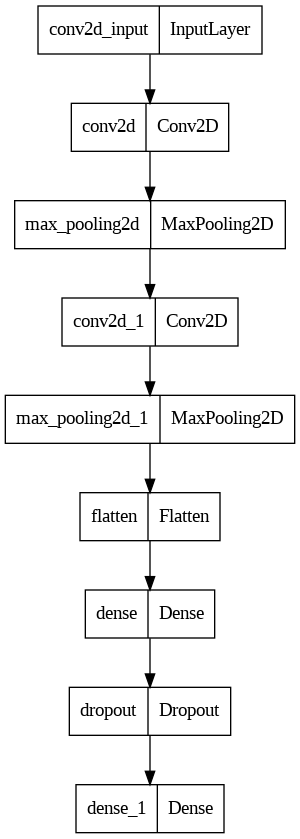

In [5]:
keras.utils.plot_model(model)


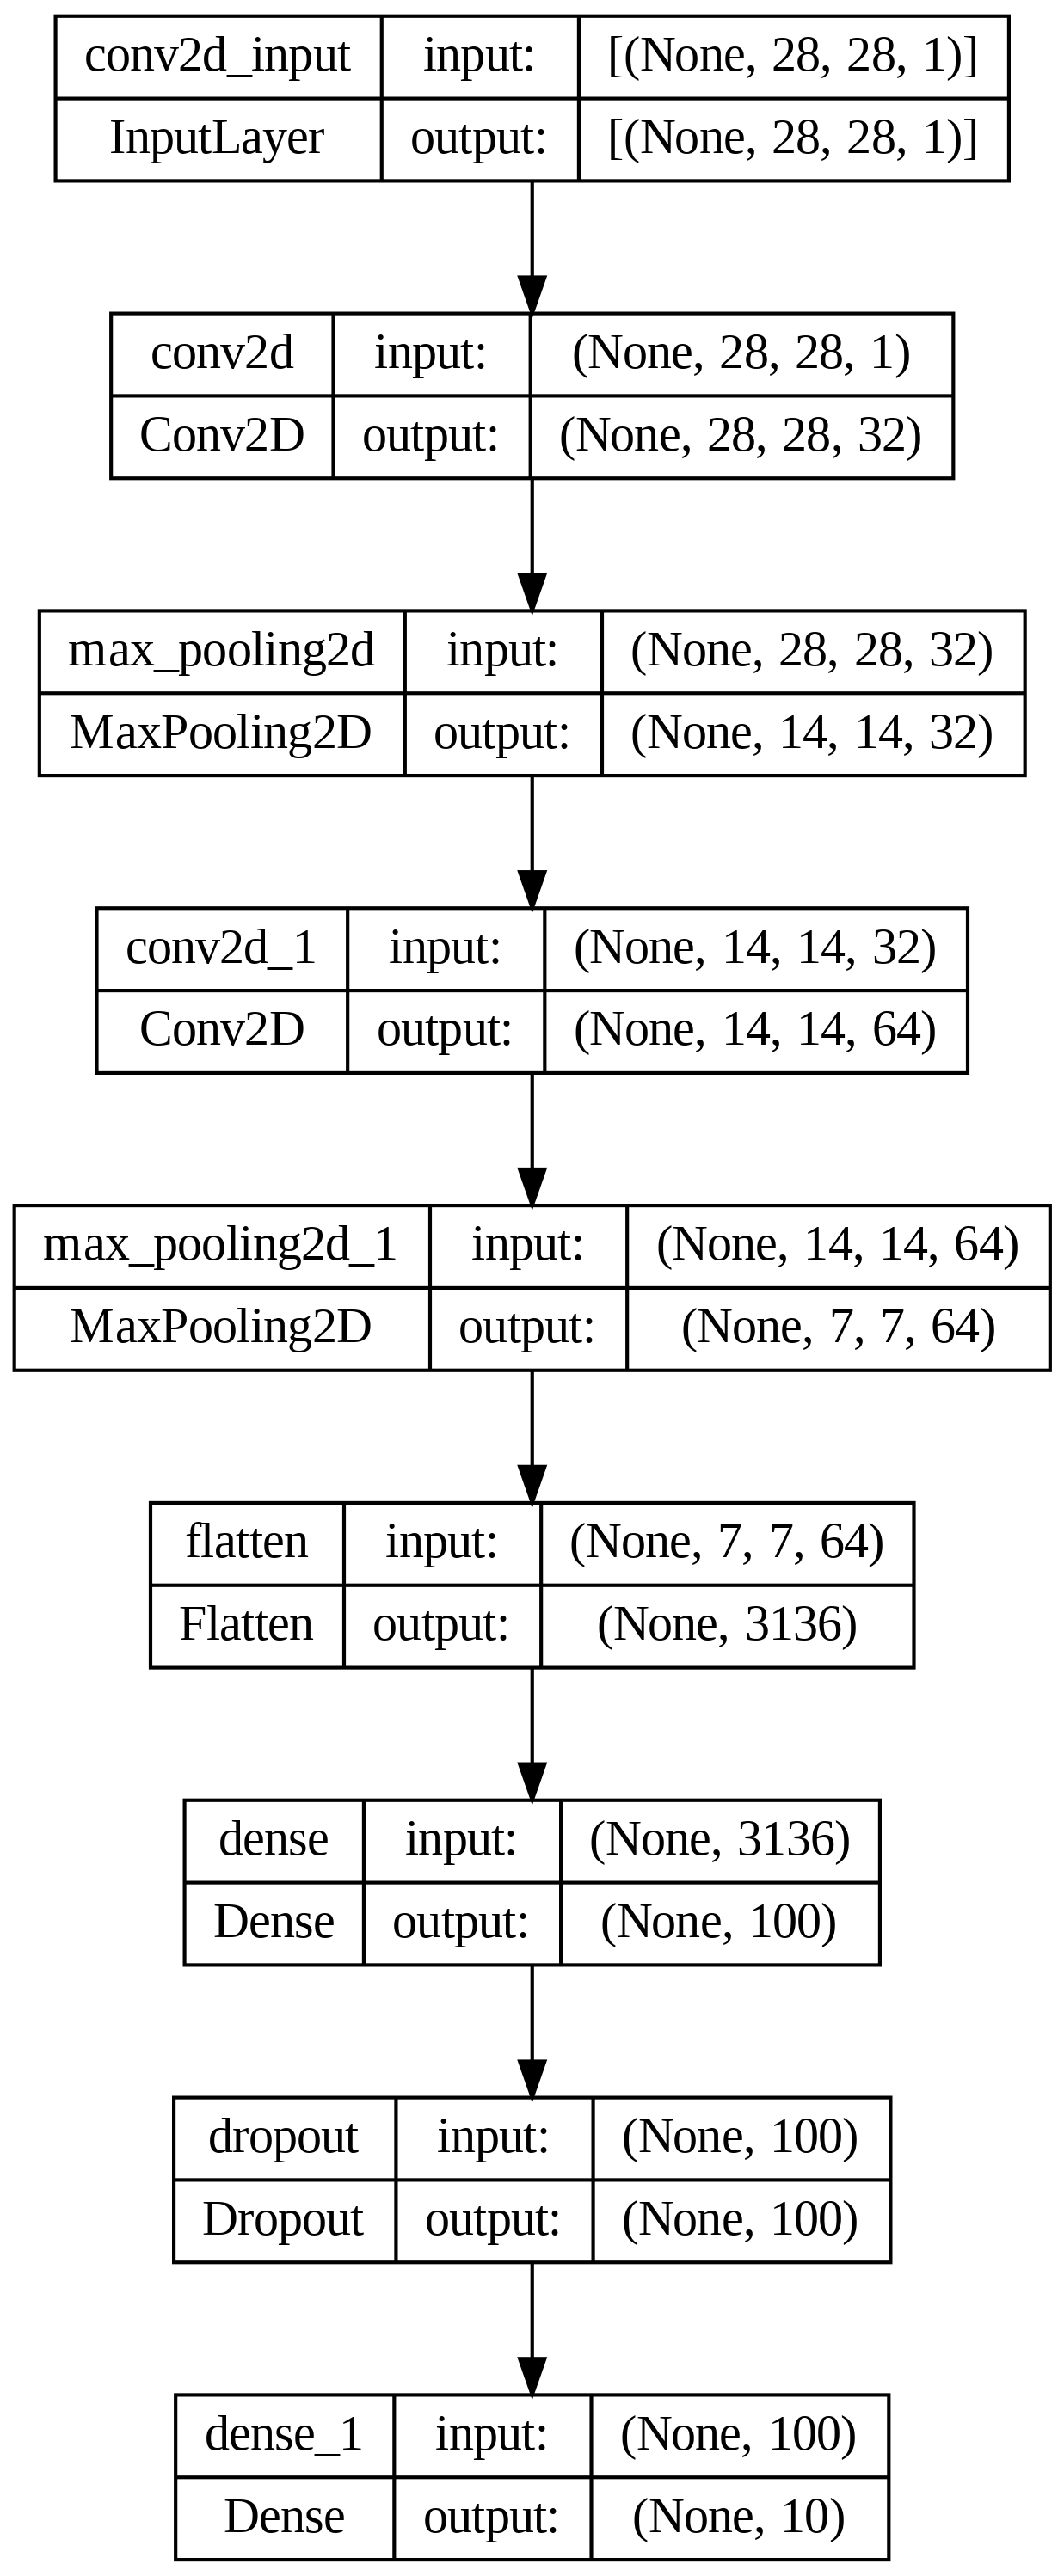

In [6]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)


In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


In [8]:

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [9]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 22s 6ms/step - loss: 0.5308 - accuracy: 0.8109 - val_loss: 0.3282 - val_accuracy: 0.8810
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3499 - accuracy: 0.8752 - val_loss: 0.2929 - val_accuracy: 0.8906
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2968 - accuracy: 0.8926 - val_loss: 0.2496 - val_accuracy: 0.9070
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2619 - accuracy: 0.9047 - val_loss: 0.2392 - val_accuracy: 0.9096
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2400 - accuracy: 0.9137 - val_loss: 0.2363 - val_accuracy: 0.9137
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2214 - accuracy: 0.9192 - val_loss: 0.2239 - val_accuracy: 0.9164
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2022 - accuracy: 0.9255 - val_loss: 0.2213 - val_accuracy

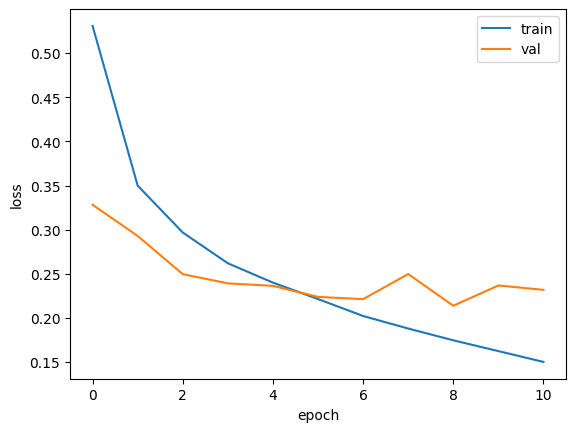

In [10]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
     

In [11]:
model.evaluate(val_scaled, val_target)


375/375 [==============================] - 1s 3ms/step - loss: 0.2138 - accuracy: 0.9235


[0.2138364613056183, 0.9235000014305115]

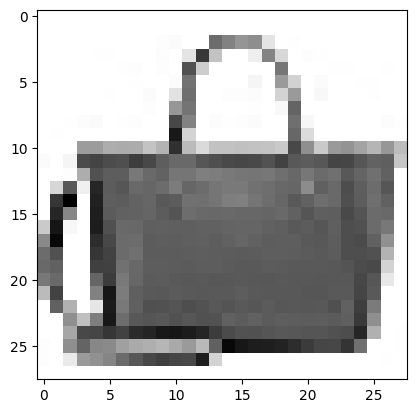

In [12]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 160ms/step
[[7.1827749e-18 3.5640596e-31 1.5194972e-25 2.7659013e-26 6.8325366e-22
  1.7347282e-21 1.8609496e-21 1.2960690e-20 1.0000000e+00 2.8370529e-24]]


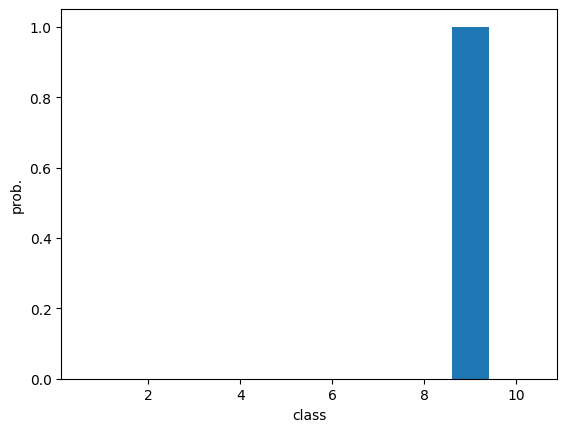

In [14]:

plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']


In [16]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0


In [18]:
model.evaluate(test_scaled, test_target)


313/313 [==============================] - 1s 4ms/step - loss: 0.2451 - accuracy: 0.9134


[0.24513117969036102, 0.9133999943733215]

In [19]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')